### 영화 리뷰 분류 : 이진분류예제
--------------------
IMDB 데이터셋: 케라스에 포함되어있는 데이터셋으로 인터넷 영화의 데이터베이스로부터 가져온 양극단의 리뷰 5만개로 이루어진 데이터셋

--------------------

IMDB 데이터 특징
- 1) 전처리되어 있어 각 리뷰가 숫자 시퀀스로 변환되어 있음
- 2) 각 숫자는 사전에 있는 고유한 단어를 나타냄
- 3) 훈련 데이터 2만 5천개와 테스트 데이터 2만 5천개로 나뉨
- 4) 각각 50%는 긍정, 50%는 부정으로 구성

- 케라스 데이터셋에서 imdb 데이터셋 임포트
- 리뷰의 목록으로 긍정(1)과 부정(0)으로 나타내는 리스트, 훈련데이터 2만5천개중 1만개를 사용
- 실제 데이터는 단어들로 되어있고 정수 변환과 인코딩과정을 통해 정수로나타난다.

In [21]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


- 훈련 데이터를 0으로 채워진 행렬을 (9999,10000) 크기로 만드는 함수
- results[i]에서 특정 인덱스의 위치를 1로 만든다.
- result 행렬은 2차원 배열이다.
- 훈련 데이터, 테스트 데이터, 레이블을 벡터로 변환한다.

In [22]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train=vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

- 3개의 층으로 된 신경망을 구현한다
- 16개의 은닉 유닛이 있다
- sigmoid는 2진분류목적으로 사용

In [23]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

- rmsprop 옵티마이저, binary_crossentropy 손실 함수로 모델 설정

In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

- loss와 metrics 매개변수에 함수 객체 전달

In [25]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

- 원본 훈련 데이터에서 10000개 샘플로 검증 세트 생성

In [26]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

- 모델을 512개의 샘플씩 미니 배치 만들고 20번의 에포크 동안 훈련

In [27]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 255us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 3s 202us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 3s 200us/step - loss: 0.2179 - acc: 0.9284 - val_loss: 0.3086 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 3s 208us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8831
Epoch 5/20
15000/15000 [==============================] - 3s 205us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 3s 224us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3165 - val_acc: 0.8772
Epoch 7/20
15000/15000 [==============================] - 3s 225us/step - loss: 0.0980 - acc: 0.9707 - val_loss: 0.3127 - 

- 파란점과 파란 실선을 이용해 훈련과 검증 손실 그리기

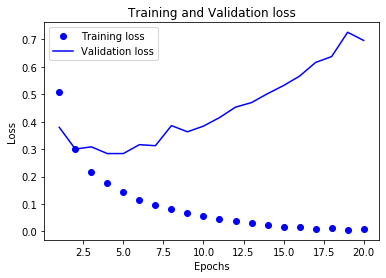

In [28]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

- 파란점과 파란 실선을 이용해 훈련과 검증 정확도 그리기

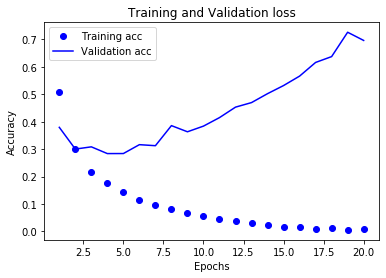

In [29]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, loss, 'bo', label='Training acc')
plt.plot(epochs, val_loss, 'b', label='Validation acc')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

- 모델을 다시 훈련시킨다

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 147us/step - loss: 0.4632 - acc: 0.8181
Epoch 2/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.2659 - acc: 0.9062
Epoch 3/4
25000/25000 [==============================] - 3s 133us/step - loss: 0.2045 - acc: 0.9274
Epoch 4/4
25000/25000 [==============================] - 5s 192us/step
